In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor


In [2]:
diamonds = pd.read_csv('./data/diamondsql.csv')
diamonds

,index_id,price,city_id,carat,city_id.1,city,index_id.1,cut_id,color_id,clarity_id,...,clarity_id.1,clarity,color_id.1,color,index_id.2,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,Madrid,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65.

In [3]:
diamonds = diamonds.drop(['index_id', 'city_id', 'city_id.1','index_id.1','cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'clarity_id.1', 'color_id.1', 'index_id.2'], axis = 1)

In [4]:
diamonds_encoded = pd.get_dummies(diamonds, columns=['city', 'cut', 'clarity', 'color'])
diamonds_encoded

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,505,0.32,63.0,57.0,4.35,4.38,2.75,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,738,0.41,63.8,56.0,4.68,4.72,3.00,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.7,57.0,7.10,7.04,4.43,False,True,False,...,False,False,False,False,False,False,True,False,False,False
40451,12615,2.02,57.1,60.0,8.31,8.25,4.73,False,False,False,...,False,False,False,False,False,True,False,False,False,False
40452,5457,1.01,62.7,56.0,6.37,6.42,4.01,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40453,456,0.33,61.9,54.3,4.45,4.47,2.76,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 39), X_test: (8091, 39), y_train: (32364,), y_test: (8091,)


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Definir la grilla de hiperparámetros para el Random Search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7, 10],  # Profundidad máxima del árbol
    'n_estimators': [100, 500, 1000, 1500]  # Número de estimadores (árboles)
    # Agrega más hiperparámetros según sea necesario
}

# Inicializar el modelo XGBoost
model_xgb = XGBRegressor(
    colsample_bytree=0.95,
    gamma=0.14,
    subsample=0.8,
    objective='reg:squarederror',
    random_state=42
)

# Inicializar el Random Search con el modelo y la grilla de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=50,  # Número de iteraciones para la búsqueda aleatoria
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=1,
    random_state=42
)

# Ejecutar el Random Search en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(best_params)

# Entrenar el mejor modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)


Mejores hiperparámetros encontrados:
{'n_estimators': 1500, 'max_depth': 7, 'learning_rate': 0.01}


In [8]:
mean_squared_error(y_test, y_pred)

300047.9990286968

In [9]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

/Users/guillemorato/miniconda3/envs/sklearn_/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


547.7663726705911

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [11]:
rmse_scores = np.sqrt(-scores)

# Imprimir los resultados
print("RMSE scores:", rmse_scores)
print("RMSE promedio:", rmse_scores.mean())

RMSE scores: [594.79857652 601.49289127 589.08178298 589.62416398 581.66811174]
RMSE promedio: 591.3331052984252


In [16]:
import pandas as pd

# Calcula la proporción entre x, y y z
diamonds['ratio_xy'] = diamonds['x'] / diamonds['y']
diamonds['ratio_yz'] = diamonds['y'] / diamonds['z']
diamonds['ratio_xz'] = diamonds['x'] / diamonds['z']

# Combina características
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Aplica transformaciones
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['sqrt_carat'] = np.sqrt(diamonds['carat'])

# Evalúa las nuevas características
correlation = diamonds[['ratio_xy', 'ratio_yz', 'ratio_xz', 'volume', 'log_price', 'sqrt_carat', 'price']].corr()
print(correlation)

# Agrega nuevas características al conjunto de datos original
X = diamonds.drop(columns=['price'])
y = diamonds['price']


            ratio_xy  ratio_yz  ratio_xz    volume  log_price  sqrt_carat  \
ratio_xy    1.000000 -0.351858  0.147409  0.035712   0.106242    0.121810   
ratio_yz   -0.351858  1.000000  0.780530  0.089987  -0.010028   -0.030780   
ratio_xz    0.147409  0.780530  1.000000 -0.000481   0.028454    0.008867   
volume      0.035712  0.089987 -0.000481  1.000000   0.895991    0.960751   
log_price   0.106242 -0.010028  0.028454  0.895991   1.000000    0.954604   
sqrt_carat  0.121810 -0.030780  0.008867  0.960751   0.954604    1.000000   
price       0.075726  0.003477  0.030206  0.898684   0.895859    0.899122   

               price  
ratio_xy    0.075726  
ratio_yz    0.003477  
ratio_xz    0.030206  
volume      0.898684  
log_price   0.895859  
sqrt_carat  0.899122  
price       1.000000  


Las 10 características más importantes:
        Feature  Importance
4             y    0.445662
0         carat    0.155266
24   clarity_I1    0.066961
27  clarity_SI2    0.046325
26  clarity_SI1    0.032251
38      color_J    0.027757
29  clarity_VS2    0.021757
25   clarity_IF    0.021641
28  clarity_VS1    0.021431
37      color_I    0.018179


/var/folders/jc/qq1vk7b51y99hz7f9gkm2xfr0000gn/T/ipykernel_23128/1442133341.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


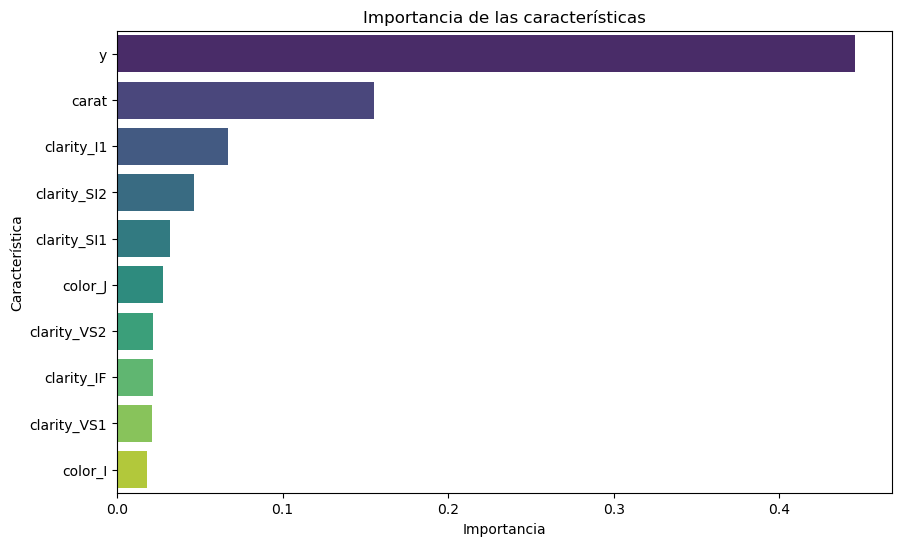

In [19]:
import seaborn as sns
importance = best_model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir las 10 características más importantes
print("Las 10 características más importantes:")
print(feature_importance_df.head(10))

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [20]:
# Definir la lista de las características más importantes
important_features = ['y', 'carat', 'clarity_I1', 'clarity_SI2', 'clarity_SI1', 'color_J', 'clarity_VS2', 'clarity_IF', 'clarity_VS1', 'color_I']

In [22]:
print(X.columns)
print(important_features)


Index(['carat', 'city', 'cut', 'clarity', 'color', 'depth', 'table', 'x', 'y',
       'z', 'ratio_xy', 'ratio_yz', 'ratio_xz', 'volume', 'log_price',
       'sqrt_carat'],
      dtype='object')
['y', 'carat', 'clarity_I1', 'clarity_SI2', 'clarity_SI1', 'color_J', 'clarity_VS2', 'clarity_IF', 'clarity_VS1', 'color_I']


In [21]:
# Seleccionar solo las características importantes del conjunto de datos original
X_selected = X[important_features]

KeyError: "['clarity_I1', 'clarity_SI2', 'clarity_SI1', 'color_J', 'clarity_VS2', 'clarity_IF', 'clarity_VS1', 'color_I'] not in index"

In [ ]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')

In [ ]:
diamonds_encoded_test = pd.get_dummies(diamonds_test, columns=['city', 'cut', 'clarity', 'color'])


In [ ]:
X_prueba = diamonds_encoded_test.drop('id', axis=1)

In [ ]:
y_prueba = model_xgb.predict(X_prueba)

In [ ]:
solution = []
for i, value in enumerate(y_prueba):
    solution.append((i,value))
    

In [ ]:
solution_df = pd.DataFrame(solution)

In [ ]:
solution_df.columns = ['id', 'price']

In [ ]:
solution_df['price'].to_csv('XGBoostparameters1.csv')

In [14]:
diamonds_encoded.to_csv('diamonds_encoded.csv')

In [15]:
diamonds_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               40455 non-null  int64  
 1   carat               40455 non-null  float64
 2   depth               40455 non-null  float64
 3   table               40455 non-null  float64
 4   x                   40455 non-null  float64
 5   y                   40455 non-null  float64
 6   z                   40455 non-null  float64
 7   city_Amsterdam      40455 non-null  bool   
 8   city_Antwerp        40455 non-null  bool   
 9   city_Dubai          40455 non-null  bool   
 10  city_Kimberly       40455 non-null  bool   
 11  city_Las Vegas      40455 non-null  bool   
 12  city_London         40455 non-null  bool   
 13  city_Luxembourg     40455 non-null  bool   
 14  city_Madrid         40455 non-null  bool   
 15  city_New York City  40455 non-null  bool   
 16  city